# 2. Data Acquisition & Understanding (TDSP Step 2)

Tahap ini bertujuan untuk memahami struktur dan kualitas data yang digunakan sebelum melangkah ke tahap pemodelan.

Langkah-langkah utama:
1. Mengambil (load) data dari sumber.
2. Memahami struktur data dan tipe datanya.
3. Melakukan pengecekan awal (data health check).
4. Membuat ringkasan nilai unik per kolom.

---
## 2.1 Sumber Data

Dataset berasal dari **Syarah.com**, platform jual-beli mobil bekas di Arab Saudi.

File data: `./Dataset/UsedCarsSA_Unclean_EN.csv` (atau sesuaikan dengan direktori lokalmu).

---
## 2.2 Import Library & Load Dataset

Kita mulai dengan mengimpor library dan membaca file CSV menggunakan pandas.

In [1]:
# Import library dan load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Load dataset
data_path = '../Dataset/UsedCarsSA_Unclean_EN.csv'
real_df = pd.read_csv(data_path)
df = real_df.copy()
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


## 2.3 Data Dictionary

| Kolom | Deskripsi |
|-------|------------|
| Link | URL halaman detail mobil |
| Make | Merk mobil (Hyundai, Toyota, dll.) |
| Type | Tipe / model (Accent, Camry, dll.) |
| Year | Tahun produksi |
| Origin | Asal mobil (Saudi, GCC, Import, dll.) |
| Gear_Type | Jenis transmisi |
| Engine_Size | Ukuran mesin (liter) |
| Fuel_Type | Jenis bahan bakar |
| Region | Wilayah listing |
| Mileage | Jarak tempuh (km) |
| Price | Harga listing (SAR) |
| Options | Opsi tambahan / paket fitur |
| Condition | Kondisi (biasanya "Used") |
| Negotiable | Apakah harga bisa dinego |


## 2.4 Quick Data Health Check

Langkah awal untuk menilai kelengkapan dan kualitas data:
- Melihat ukuran data (baris dan kolom)
- Melihat tipe data
- Statistik deskriptif
- Jumlah nilai unik per kolom

In [3]:
# Informasi umum dataset
print('Shape (rows, columns):', df.shape)
print('\nInfo:')
df.info()

Shape (rows, columns): (8248, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


In [4]:
# Statistik deskriptif numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8248.0,2014.014064,5.935349,1936.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,5982.0,3.175794,1.567480,1.0,2.0,2.7,4.0,9.0
Mileage,8248.0,149412.813531,345525.845645,100.0,37000.0,101657.5,195552.0,20000000.0


In [5]:
# Statistik deskriptif semua kolom (termasuk kategorikal)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Link,8248,8228,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,8248,65,Toyota,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,8248,435,Land Cruiser,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,8248.0,NaN,NaN,NaN,2014.014064,5.935349,1936.0,2012.0,2016.0,2018.0,2022.0
Origin,8153,3,Saudi,6084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,8248,15,White,3574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Options,8139,3,Full,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size,5982.0,NaN,NaN,NaN,3.175794,1.56748,1.0,2.0,2.7,4.0,9.0
Fuel_Type,8248,3,Gas,8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gear_Type,8174,2,Automatic,7069,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.5 Ringkasan Nilai Unik per Kolom

Kita buat fungsi pembantu untuk menampilkan jumlah nilai unik dan beberapa contoh nilai pada tiap kolom.

In [6]:
def unique_summary(frame, sample_size=5):
    result = []
    for col in frame.columns:
        uniques = frame[col].dropna().unique()
        result.append({
            'Column': col,
            'Unique Count': frame[col].nunique(),
            'Sample Unique': list(uniques[:sample_size])
        })
    return pd.DataFrame(result).sort_values('Unique Count', ascending=False).reset_index(drop=True)

unique_summary(df)

,Column,Unique Count,Sample Unique
0,Link,8228,[https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D...
1,Mileage,2196,"[103000, 5448, 72418, 114154, 41912]"
2,Price,549,"[114000, Negotiable, 27500, 43000, 59500]"
3,Type,435,"[C300, Patrol, Sunny, Elantra, Accord]"
4,Engine_Size,75,"[5.7, 4.8, 1.5, 1.6, 2.0]"
5,Make,65,"[Chrysler, Nissan, Hyundai, Honda, Toyota]"
6,Year,55,"[2018, 2016, 2019, 2011, 2009]"
7,Region,27,"[Riyadh, Jeddah, Dammam, Al-Medina, Qassim]"
8,Color,15,"[Black, White, Silver, Grey, Navy]"
9,Options,3,"[Full, Standard, Semi Full]"


# 3. Data Preparation & Feature Engineering (TDSP Step 2 — Extended)

Tahap ini merupakan kelanjutan dari *Data Acquisition & Understanding*, yaitu melakukan pembersihan, transformasi, dan pembuatan fitur agar data siap digunakan untuk pemodelan.

**Tujuan utama:**
- Menangani missing values.
- Menghapus kolom yang tidak relevan.
- Menangani data duplikat dan anomali.
- Menyiapkan variabel numerik dan kategorikal untuk modeling.
- Membuat fitur baru jika relevan (misalnya umur mobil).

---

## 3.1 Menangani Missing Values

Langkah pertama adalah memeriksa kolom mana yang memiliki nilai kosong (*missing*).

In [7]:
# Cek missing values per kolom
df.isna().sum().sort_values(ascending=False)

Engine_Size    2266
Options         109
Origin           95
Gear_Type        74
Make              0
Type              0
Link              0
Color             0
Year              0
Fuel_Type         0
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

### Strategi Umum Imputasi

- **Engine_Size:** diisi dengan modus berdasarkan kombinasi `(Type, Year)`.
- **Gear_Type:** diisi dengan modus global.
- Kolom lain: tergantung konteks — misalnya median untuk numerik atau 'Unknown' untuk kategorikal.

Kita buat salinan dataset sebelum melakukan imputasi.

In [8]:
df_clean = df.copy()

# Imputasi Engine_Size dengan modus per (Type, Year)
engine_group_mode = (
    df_clean.groupby(['Type', 'Year'])['Engine_Size']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

def fill_engine_size(row):
    if pd.notna(row['Engine_Size']):
        return row['Engine_Size']
    key = (row['Type'], row['Year'])
    val = engine_group_mode.get(key, np.nan)
    return val

df_clean['Engine_Size'] = df_clean.apply(fill_engine_size, axis=1)

# Jika masih ada NaN, isi dengan modus global
if df_clean['Engine_Size'].isna().sum() > 0:
    global_mode = df_clean['Engine_Size'].mode().iloc[0]
    df_clean['Engine_Size'].fillna(global_mode, inplace=True)

# Imputasi Gear_Type
if df_clean['Gear_Type'].isna().sum() > 0:
    gear_mode = df_clean['Gear_Type'].mode().iloc[0]
    df_clean['Gear_Type'].fillna(gear_mode, inplace=True)

# Untuk kolom kategorikal lainnya
categorical_cols = df_clean.select_dtypes(include='object').columns
for col in categorical_cols:
    df_clean[col].fillna('Unknown', inplace=True)

print('Missing values setelah imputasi:')
df_clean.isna().sum().sum()

Missing values setelah imputasi:


np.int64(0)

## 3.2 Menghapus Kolom yang Tidak Relevan

Beberapa kolom tidak memiliki informasi prediktif atau hanya bersifat administratif, sehingga bisa dihapus:
- `Link` (URL halaman web)
- `Condition` (jika hanya berisi satu nilai: 'Used')
- `Negotiable` (informasi negosiasi harga, tidak relevan untuk prediksi harga dasar)

In [9]:
cols_to_drop = ['Link', 'Condition', 'Negotiable']
df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns], inplace=True, errors='ignore')
df_clean.shape

(8248, 12)

## 3.3 Menghapus Duplikat dan Menangani Outlier Harga

Duplikat data akan dihapus untuk menghindari bias.
Selain itu, harga yang terlalu ekstrem juga perlu difilter agar model tidak overfit pada outlier.

In [10]:
# Hapus duplikat
print('Jumlah duplikat sebelum dihapus:', df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

# Pastikan kolom Price numerik
df_clean = df_clean[pd.to_numeric(df_clean['Price'], errors='coerce').notna()]
df_clean['Price'] = df_clean['Price'].astype(float)

# Hapus outlier harga ekstrem (1% bawah dan 99% atas)
q1, q99 = df_clean['Price'].quantile([0.01, 0.99])
df_clean = df_clean[(df_clean['Price'] >= q1) & (df_clean['Price'] <= q99)]

print('Data setelah bersih:', df_clean.shape)

Jumlah duplikat sebelum dihapus: 71
Data setelah bersih: (5482, 12)


## 3.4 Exploratory Data Analysis Singkat

Visualisasi awal untuk memahami hubungan antar variabel numerik dan target (Price).

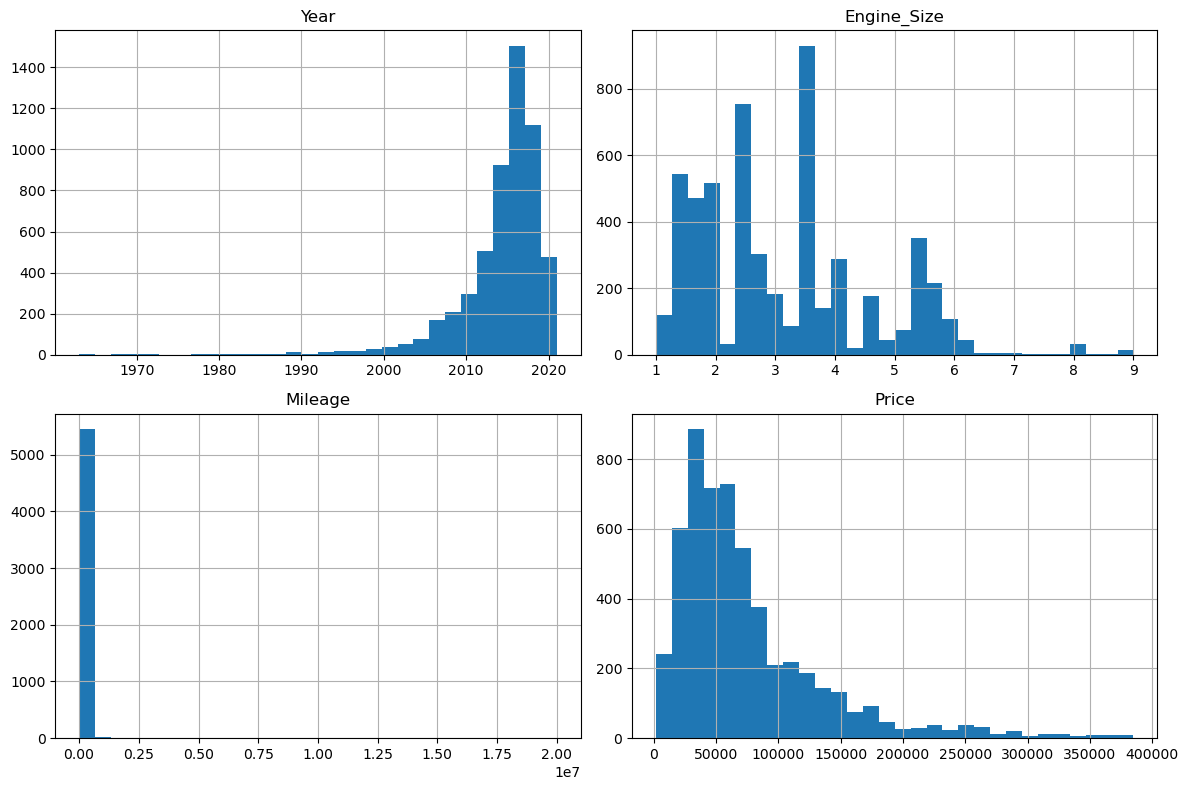

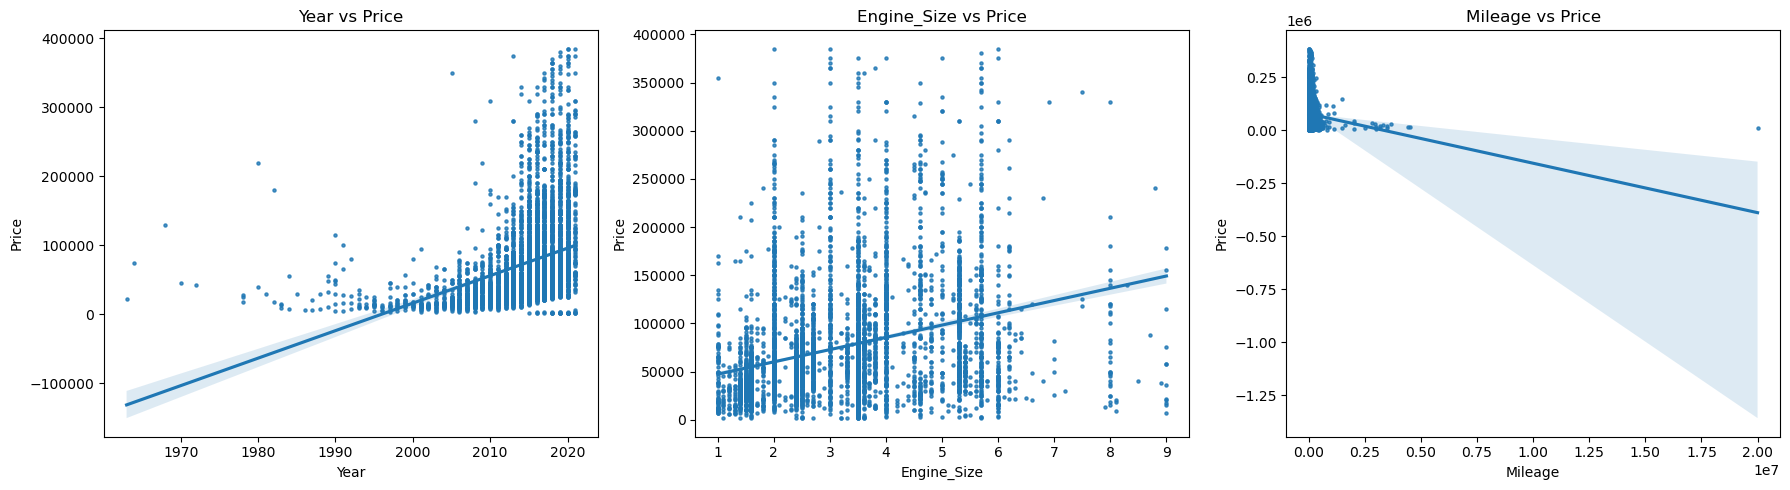

In [11]:
# Kolom numerik utama
numeric_cols = ['Year', 'Engine_Size', 'Mileage', 'Price']

# Histogram
df_clean[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Scatterplot sederhana dengan Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(data=df_clean, x='Year', y='Price', ax=axes[0], scatter_kws={'s':5})
sns.regplot(data=df_clean, x='Engine_Size', y='Price', ax=axes[1], scatter_kws={'s':5})
sns.regplot(data=df_clean, x='Mileage', y='Price', ax=axes[2], scatter_kws={'s':5})
axes[0].set_title('Year vs Price')
axes[1].set_title('Engine_Size vs Price')
axes[2].set_title('Mileage vs Price')
plt.tight_layout()
plt.show()

### Insight Awal
- **Year ↑ → Price ↑:** mobil yang lebih baru cenderung lebih mahal.
- **Mileage ↑ → Price ↓:** mobil yang lebih sering digunakan (jarak tempuh tinggi) cenderung lebih murah.
- **Engine_Size ↑ → Price ↑:** kapasitas mesin lebih besar umumnya menandakan mobil dengan segmen harga lebih tinggi.

## 3.5 Menambahkan Fitur Baru (Opsional)

Kita bisa menambahkan fitur turunan seperti **umur mobil** untuk memperkuat model.

Misalnya: `Car_Age = 2025 - Year`.

In [12]:
df_clean['Car_Age'] = 2025 - df_clean['Year']
df_clean[['Year', 'Car_Age']].head()

,Year,Car_Age
0,2018,7
2,2019,6
3,2019,6
4,2019,6
5,2018,7


## 3.6 Simpan Dataset Bersih (Opsional)

Langkah ini membantu agar proses modeling berikutnya bisa dimulai langsung dari dataset yang sudah bersih.

In [13]:
df_clean.to_csv('../Dataset/UsedCarsSA_Clean.csv', index=False)
print('Dataset bersih berhasil disimpan!')

Dataset bersih berhasil disimpan!
